### Sobhan Moradian Daghigh 

* 1-31-2023
* SML Final Project

In [828]:
# !pip install persiantools
# !pip install statsmodels --user

In [1309]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from persiantools.jdatetime import JalaliDate
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from PIL import Image
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import mean_absolute_error, confusion_matrix

### Loading Datas

In [830]:
iran_china_clay = pd.read_csv('./Datasets/Iran.China.Clay.csv')
iran_khodro = pd.read_csv('./Datasets/Iran.Khodro.csv')
s_mobarakeh_steel = pd.read_csv('./Datasets/S_Mobarakeh.Steel.csv')
social_sec_inv = pd.read_csv('./Datasets/Social.Sec.Inv.csv')
tose_atlas_mofid = pd.read_csv('./Datasets/ToseAtlasMofid.ETF.csv')
total_indices = pd.read_csv('./Datasets/Total_indices.csv')

datasets = [iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices]
names = ['iran_china_clay', 'iran_khodro', 's_mobarakeh_steel', 'social_sec_inv', 'tose_atlas_mofid', 'total_indices']

In [831]:
iran_china_clay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2983 non-null   object 
 1   <DTYYYYMMDD>  2983 non-null   int64  
 2   <FIRST>       2983 non-null   float64
 3   <HIGH>        2983 non-null   float64
 4   <LOW>         2983 non-null   float64
 5   <CLOSE>       2983 non-null   float64
 6   <VALUE>       2983 non-null   int64  
 7   <VOL>         2983 non-null   int64  
 8   <OPENINT>     2983 non-null   int64  
 9   <PER>         2983 non-null   object 
 10  <OPEN>        2983 non-null   float64
 11  <LAST>        2983 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 279.8+ KB


In [832]:
iran_khodro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      4572 non-null   object 
 1   <DTYYYYMMDD>  4572 non-null   int64  
 2   <FIRST>       4572 non-null   float64
 3   <HIGH>        4572 non-null   float64
 4   <LOW>         4572 non-null   float64
 5   <CLOSE>       4572 non-null   float64
 6   <VALUE>       4572 non-null   int64  
 7   <VOL>         4572 non-null   int64  
 8   <OPENINT>     4572 non-null   int64  
 9   <PER>         4572 non-null   object 
 10  <OPEN>        4572 non-null   float64
 11  <LAST>        4572 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 428.8+ KB


In [833]:
s_mobarakeh_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      3507 non-null   object 
 1   <DTYYYYMMDD>  3507 non-null   int64  
 2   <FIRST>       3507 non-null   float64
 3   <HIGH>        3507 non-null   float64
 4   <LOW>         3507 non-null   float64
 5   <CLOSE>       3507 non-null   float64
 6   <VALUE>       3507 non-null   int64  
 7   <VOL>         3507 non-null   int64  
 8   <OPENINT>     3507 non-null   int64  
 9   <PER>         3507 non-null   object 
 10  <OPEN>        3507 non-null   float64
 11  <LAST>        3507 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 328.9+ KB


In [834]:
social_sec_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      547 non-null    object 
 1   <DTYYYYMMDD>  547 non-null    int64  
 2   <FIRST>       547 non-null    float64
 3   <HIGH>        547 non-null    float64
 4   <LOW>         547 non-null    float64
 5   <CLOSE>       547 non-null    float64
 6   <VALUE>       547 non-null    int64  
 7   <VOL>         547 non-null    int64  
 8   <OPENINT>     547 non-null    int64  
 9   <PER>         547 non-null    object 
 10  <OPEN>        547 non-null    float64
 11  <LAST>        547 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 51.4+ KB


In [835]:
tose_atlas_mofid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2085 non-null   object 
 1   <DTYYYYMMDD>  2085 non-null   int64  
 2   <FIRST>       2085 non-null   float64
 3   <HIGH>        2085 non-null   float64
 4   <LOW>         2085 non-null   float64
 5   <CLOSE>       2085 non-null   float64
 6   <VALUE>       2085 non-null   int64  
 7   <VOL>         2085 non-null   int64  
 8   <OPENINT>     2085 non-null   int64  
 9   <PER>         2085 non-null   object 
 10  <OPEN>        2085 non-null   float64
 11  <LAST>        2085 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 195.6+ KB


In [836]:
total_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DTYYYYMMDD>  690 non-null    object 
 1   <CLOSE>       690 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.9+ KB


### Convert Jalali dates to Gregorian for "total_indices" dataset

In [837]:
cnvs = []
for ele in total_indices.iterrows():
    temp = ele[1]['<DTYYYYMMDD>'].split('/')
    cnvs.append(int(JalaliDate(int(temp[0]), int(temp[1]), int(temp[2])).to_gregorian().strftime('%Y%m%d')))
total_indices['<DTYYYYMMDD>'] = cnvs
total_indices

,<DTYYYYMMDD>,<CLOSE>
0,20230130,1539679.610
1,20230129,1542190.690
2,20230128,1600083.660
3,20230125,1611955.890
4,20230124,1646053.520
...,...,...
685,20200330,547658.505
686,20200329,545649.374
687,20200328,532525.281
688,20200325,521267.671


### Filter last two years

In [838]:
def get_unique_dates(stocks):
    temp = [stock['<DTYYYYMMDD>'] for stock in stocks]
    intersect = list(set(temp[0]).intersection(*temp))
    intersect.sort()
    return intersect

def get_last_n_years(datasets, intersect, n=2, intersect_allow=False):
    # 20000 stands for two years
    filtered = []
    days = [x for x in intersect if x >= intersect[-1] - 20000]    
    for dataset in datasets:
        if intersect_allow:
            filtered.append(pd.DataFrame(dataset.loc[dataset['<DTYYYYMMDD>'].isin(days)]))
        else:
            filtered.append(dataset.loc[dataset['<DTYYYYMMDD>'] >= dataset.loc[0, '<DTYYYYMMDD>'] - 20000])
    return filtered

In [839]:
intersect = get_unique_dates(stocks=datasets)
[iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices] = get_last_n_years(datasets, intersect, n=2)
datasets = [iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices]

In [840]:
# For example
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0


#### Ready to lunch the JET ))

### Q1.

In [841]:
#           pi - pi-1
#    ri =  ___________      ; pi = <CLOSE>
#             pi-1

In [842]:
def cal_returns(stock):
    lst = stock.loc[:, '<CLOSE>']
    returns = []
    for i in range(len(lst) - 1):
        returns.append((lst[i + 1] - lst[i]) / lst[i])
    return returns

In [843]:
def plotter(stock_returns, name, typee):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(12, 8))
        x_axis = np.arange(-0.05, 0.05, 0.001)  
        if typee == 'hist':
            plt.hist(stock_returns, bins=100, density=True, alpha=0.9)
            plt.gca().set(title='Probability Histogram of <{}>'.format(name), ylabel='Frequency')
            
        elif typee == 'normal':
            plt.plot(x_axis, norm.pdf(x_axis, np.mean(total_indices_returns), np.std(total_indices_returns)))
            plt.gca().set(title='Probability Normal Distribution of <{}>'.format(name))
            
        elif typee == 'both':
            plt.hist(stock_returns, bins=100, density=True, alpha=0.9)
            plt.plot(x_axis, norm.pdf(x_axis, np.mean(total_indices_returns), np.std(total_indices_returns)), linewidth=3.0, c='r')
            plt.gca().set(title='<{}>'.format(name))
        plt.show()        

#### 1.A.

In [844]:
total_indices_returns = cal_returns(total_indices)

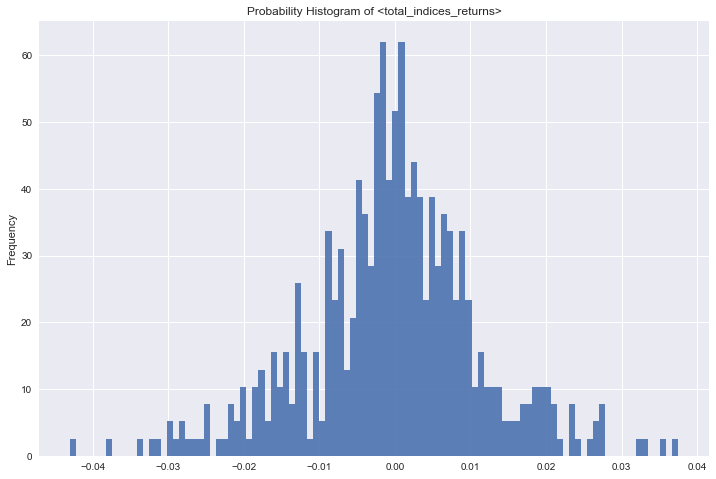

In [845]:
plotter(total_indices_returns, name='total_indices_returns', typee='hist')

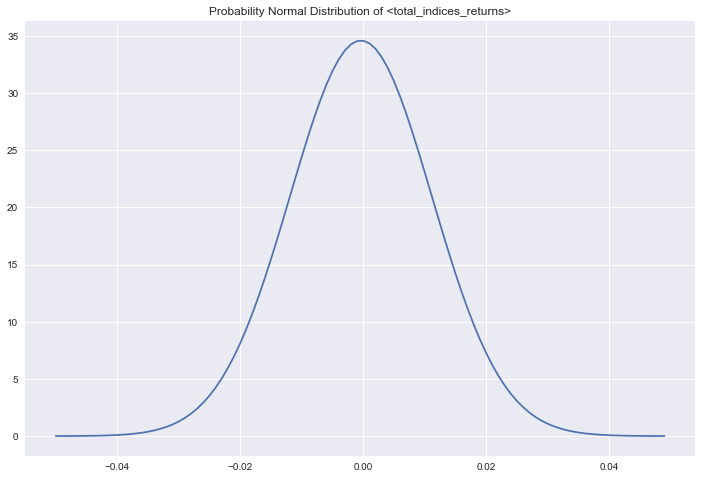

In [846]:
plotter(total_indices_returns, name='total_indices_returns', typee='normal')

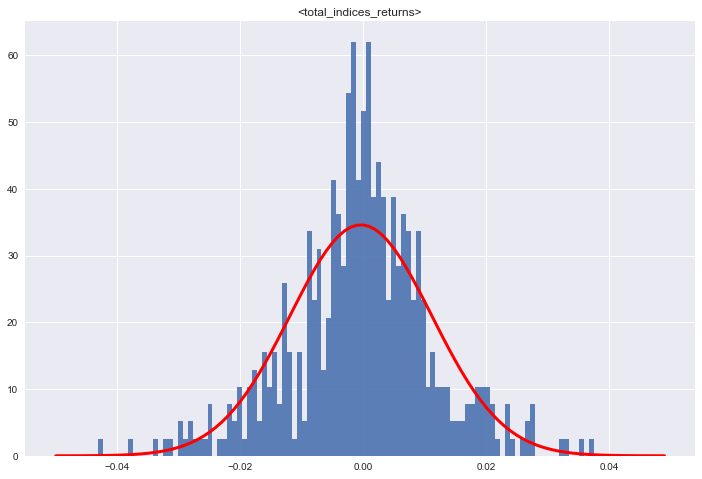

In [847]:
plotter(total_indices_returns, name='total_indices_returns', typee='both')

In [ ]:
# Part B is right after part C. 

#### 1.C.

In [850]:
iran_china_clay_returns = cal_returns(iran_china_clay)
iran_khodro_returns = cal_returns(iran_khodro)
s_mobarakeh_steel_returns = cal_returns(s_mobarakeh_steel)
social_sec_inv_returns = cal_returns(social_sec_inv)
tose_atlas_mofid_returns = cal_returns(tose_atlas_mofid)

datasets_returns = [iran_china_clay_returns, iran_khodro_returns, s_mobarakeh_steel_returns, social_sec_inv_returns, tose_atlas_mofid_returns, total_indices_returns]
[x.insert(0, 0) for x in datasets_returns]

[None, None, None, None, None, None]

In [851]:
iran_china_clay['<RETURN>'] = iran_china_clay_returns
iran_khodro['<RETURN>'] = iran_khodro_returns
s_mobarakeh_steel['<RETURN>'] = s_mobarakeh_steel_returns
social_sec_inv['<RETURN>'] = social_sec_inv_returns
tose_atlas_mofid['<RETURN>'] = tose_atlas_mofid_returns
total_indices['<RETURN>'] = total_indices_returns

In [852]:
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,<RETURN>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0,0.000000
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0,0.014937
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0,0.051508
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0,0.040588
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0,0.011432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0,0.016273
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0,0.007677
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0,0.002830
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0,0.046668


In [853]:
iran_china_clay_mean, iran_china_clay_var = np.mean(iran_china_clay_returns), np.var(iran_china_clay_returns)
iran_khodro_mean, iran_khodro_var = np.mean(iran_khodro_returns), np.var(iran_khodro_returns)
s_mobarakeh_steel_mean, s_mobarakeh_steel_var = np.mean(s_mobarakeh_steel_returns), np.var(s_mobarakeh_steel_returns)
social_sec_inv_mean, social_sec_inv_var = np.mean(social_sec_inv_returns), np.var(social_sec_inv_returns)
tose_atlas_mofid_mean, tose_atlas_mofid_var = np.mean(tose_atlas_mofid_returns), np.var(tose_atlas_mofid_returns)

x = [iran_china_clay_mean, iran_khodro_mean, s_mobarakeh_steel_mean, social_sec_inv_mean, tose_atlas_mofid_mean]
y = [iran_china_clay_var, iran_khodro_var, s_mobarakeh_steel_var, social_sec_inv_var, tose_atlas_mofid_var]

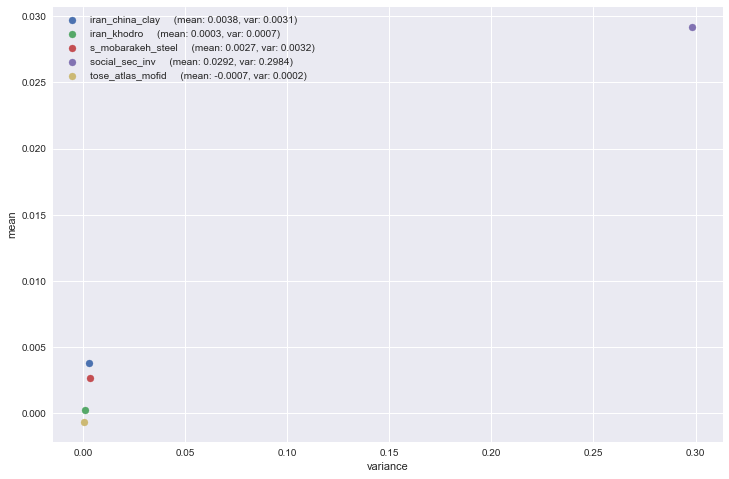

In [854]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    for i, (ele1, ele2) in enumerate(zip(x, y)): 
        plt.scatter(ele2, ele1, label=names[i] + '     (mean: {:.4f}, var: {:.4f})'.format(ele1, ele2))
    plt.gca().set(title='', ylabel='mean', xlabel='variance')
    plt.legend()
    plt.show()

#### 1.B.

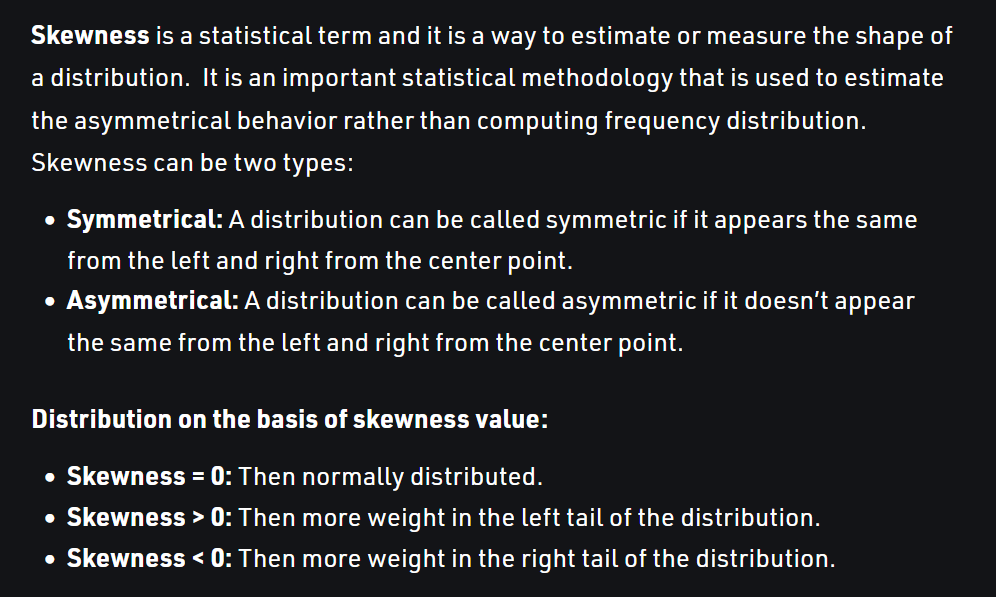

In [855]:
Image.open('./Datasets/Symmetrical.png')

In [856]:
print(skew(total_indices.loc[:, '<RETURN>'], axis=0, bias=True))

-0.14444545788157942


#### 1.D.

In [1117]:
def get_days_group(dataset, window, attr='<DTYYYYMMDD>'):
    # Sliding Window aproach:
    # s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...
    chunks = []
    lst = dataset.loc[:, attr]
    for i in range(len(lst) - window + 1):
        chunks.append(lst[i: i + window])
    return chunks

In [993]:
windows = [10, 20, 50]
# start = 20230130
# end   = 20210130
all_means_window, all_vars_window = [], []
for window in windows:
    chunks = get_days_group(total_indices, window)
    all_means, all_vars = [], []
    for stock in datasets:
        chunk_mean, chunk_var = [], []
        for chunk in chunks:
            lst = stock.loc[stock['<DTYYYYMMDD>'].isin(chunk)]['<RETURN>']
            if len(lst):
                mean, var = np.mean(lst), np.var(lst)
            else:
                mean, var = np.nan, np.nan
            chunk_mean.append(mean)
            chunk_var.append(var)
        all_means.append(chunk_mean)
        all_vars.append(chunk_var)
    all_means_window.append(all_means)
    all_vars_window.append(all_vars)

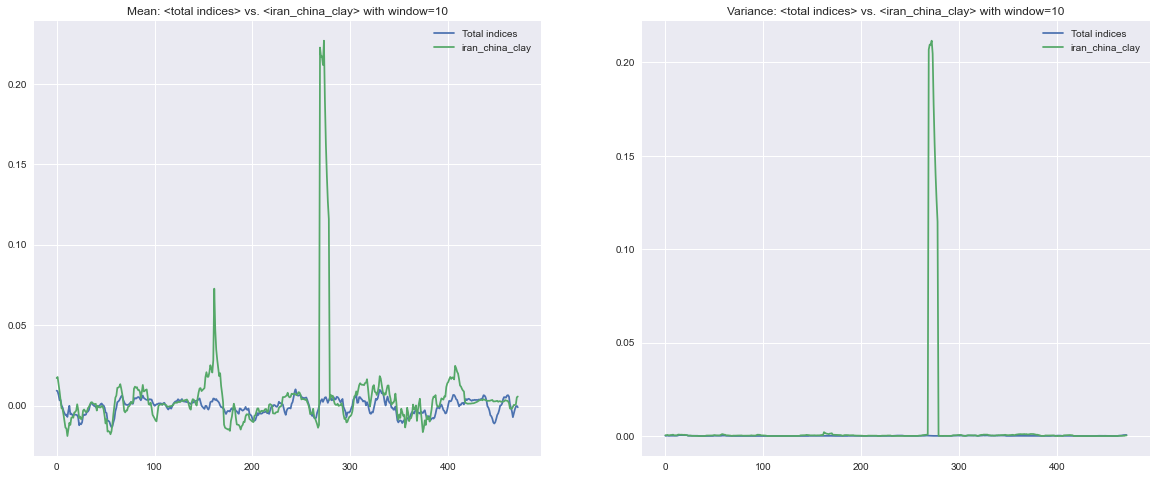

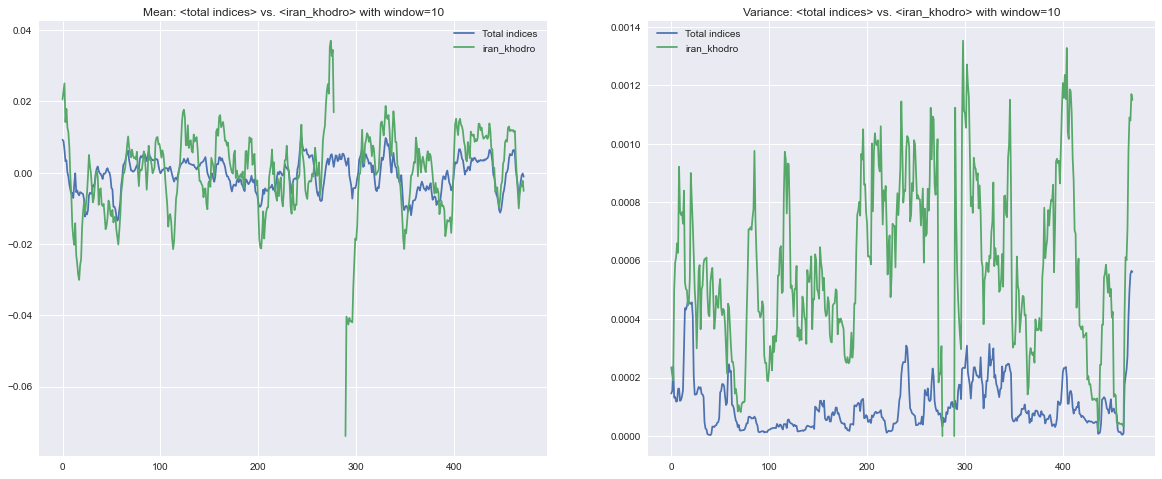

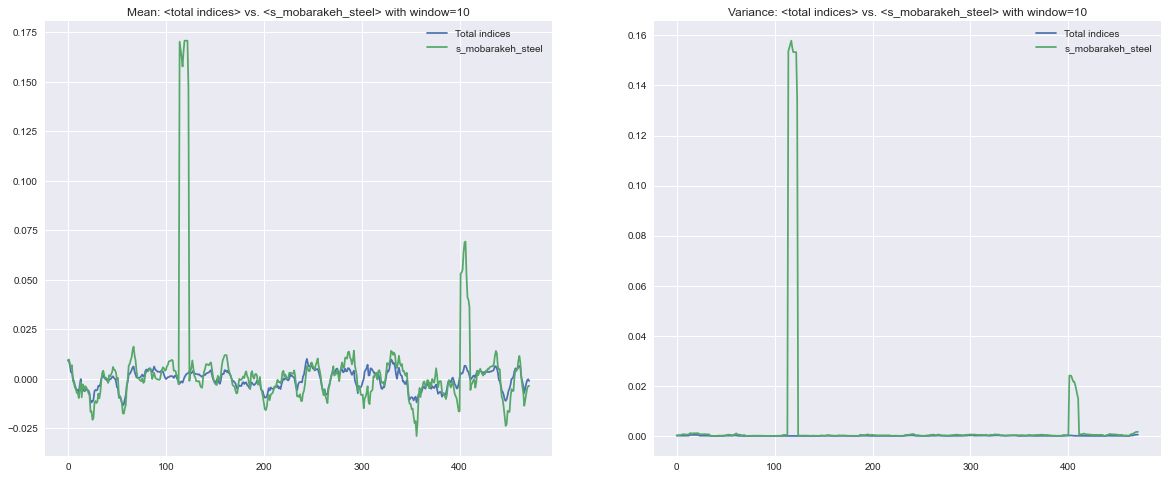

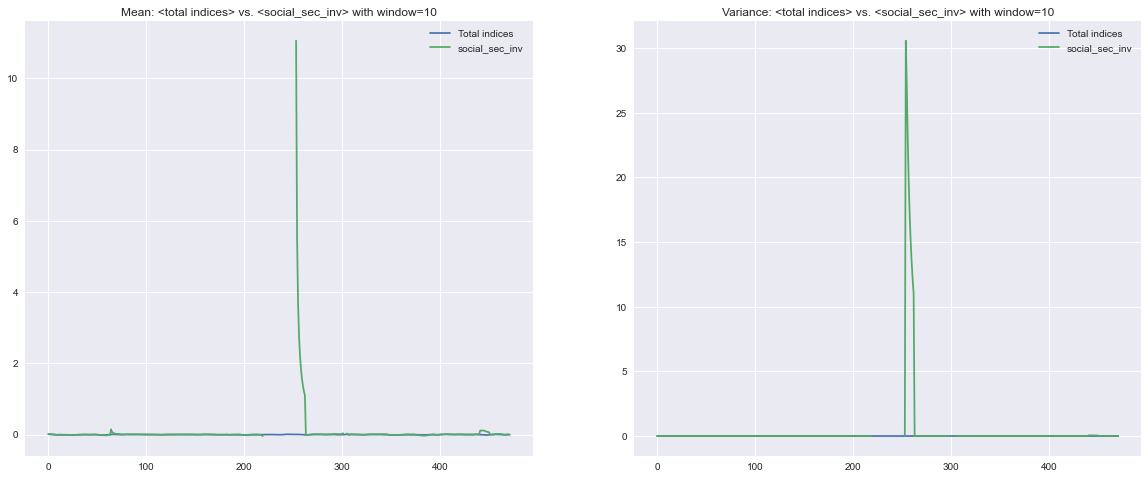

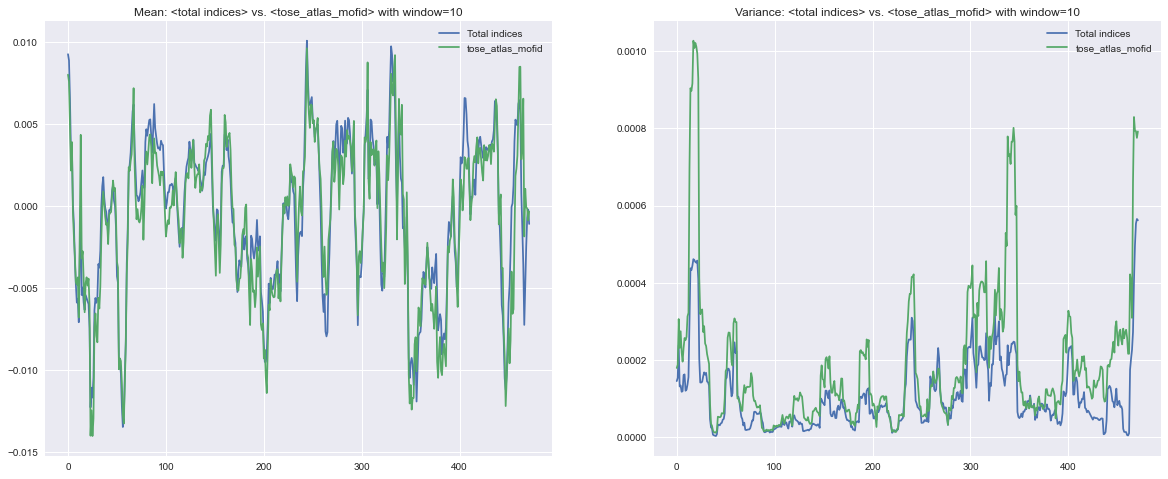

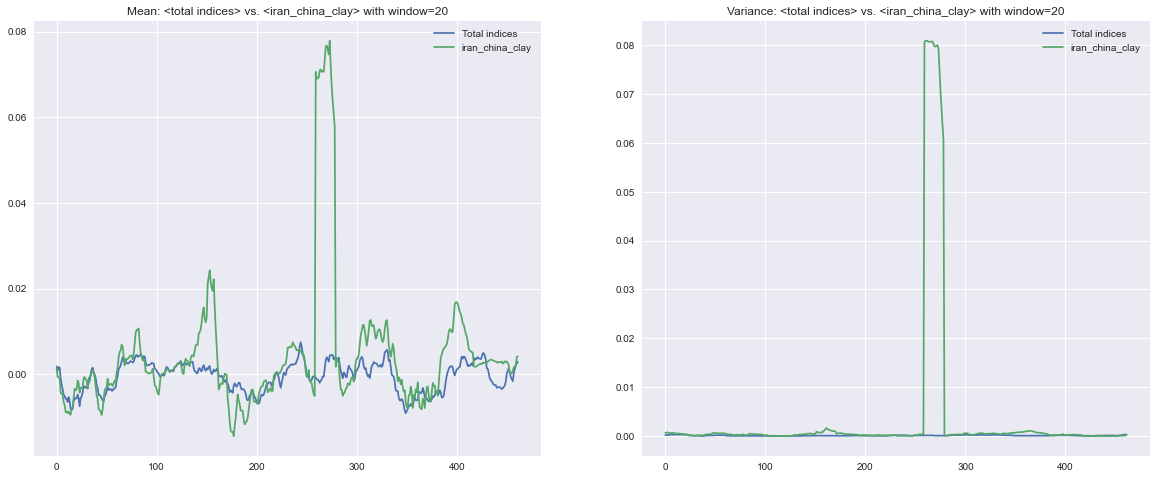

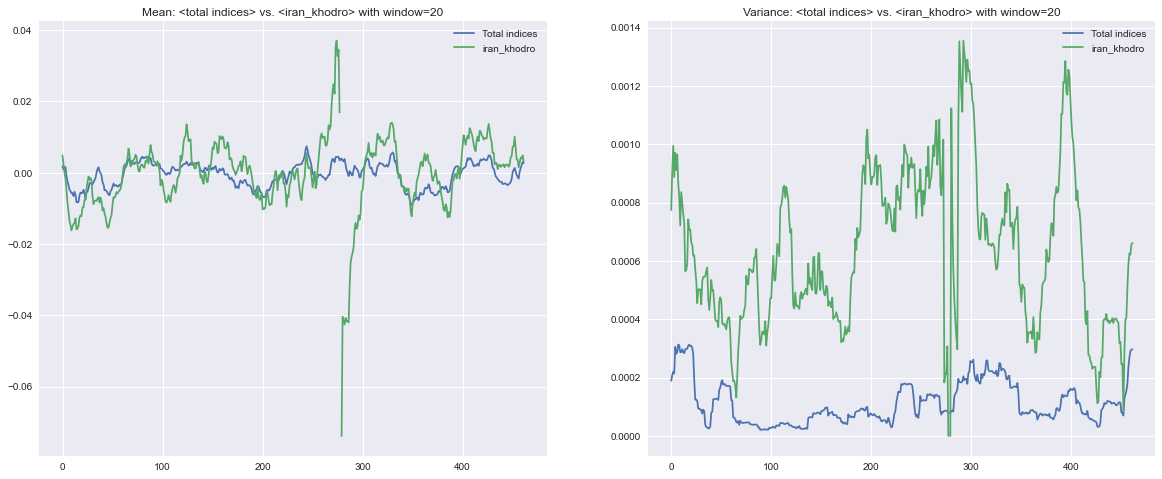

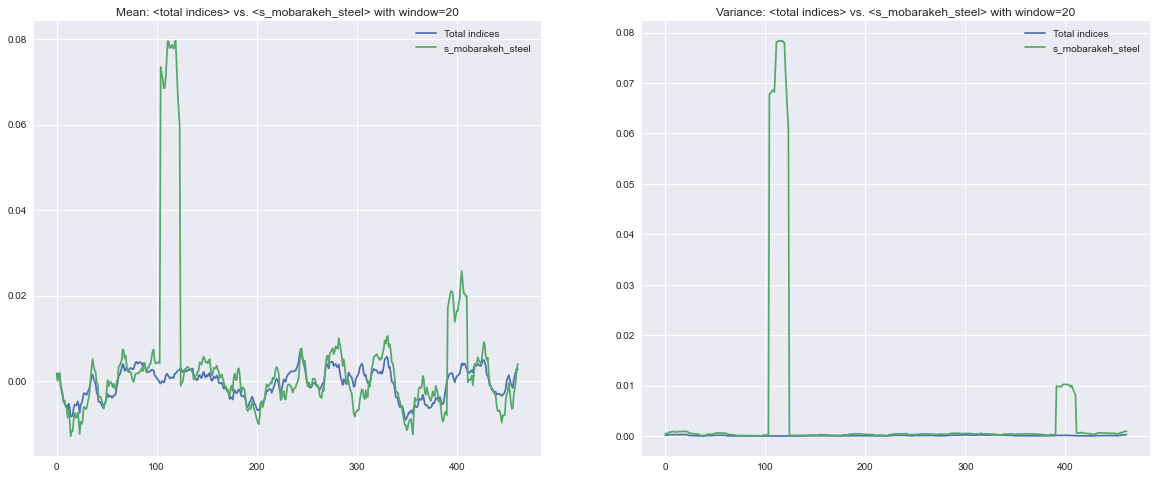

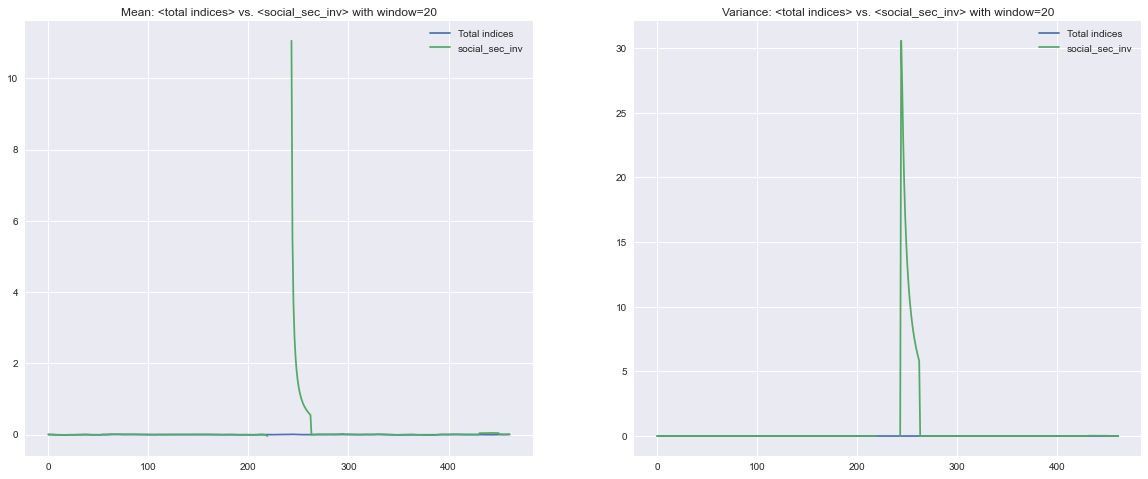

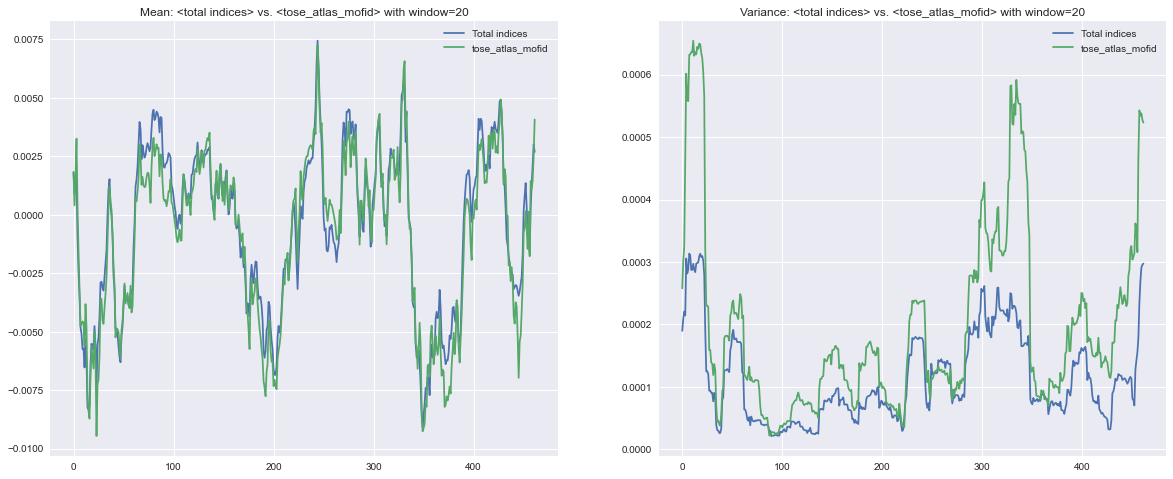

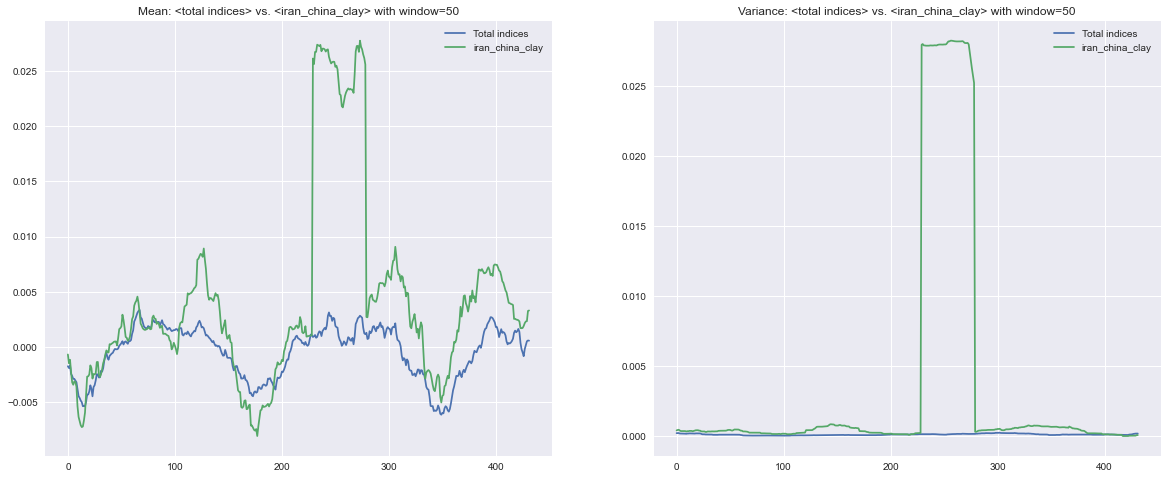

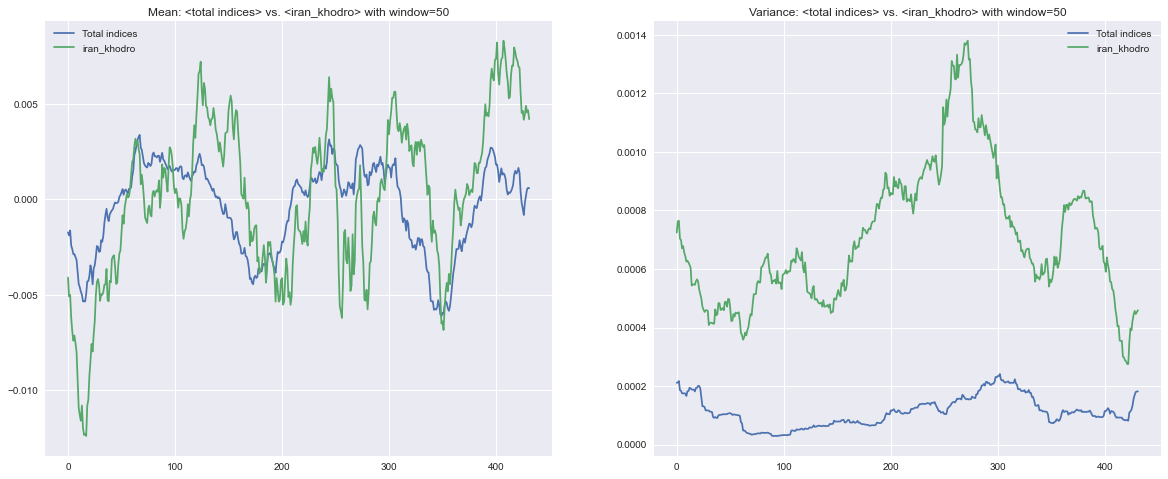

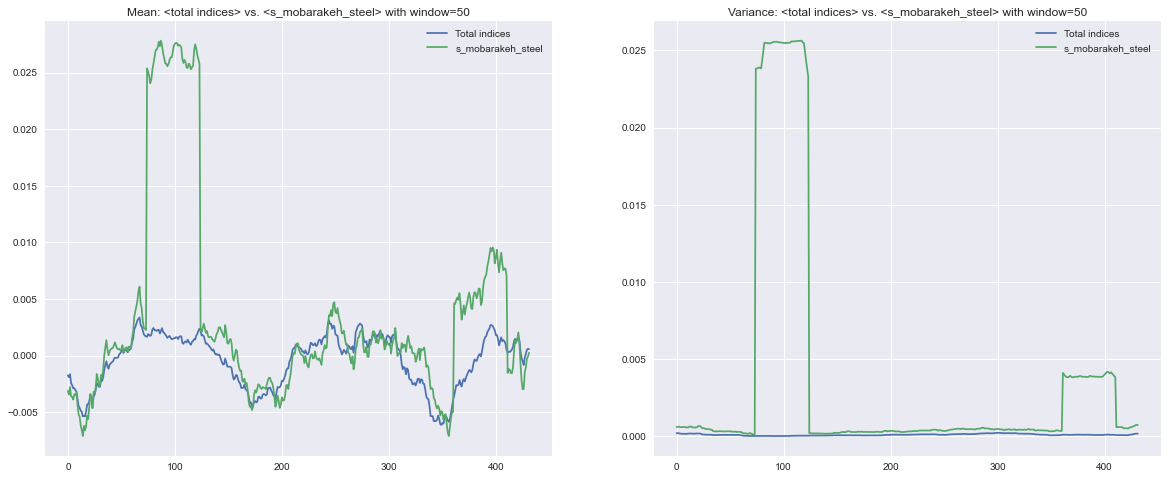

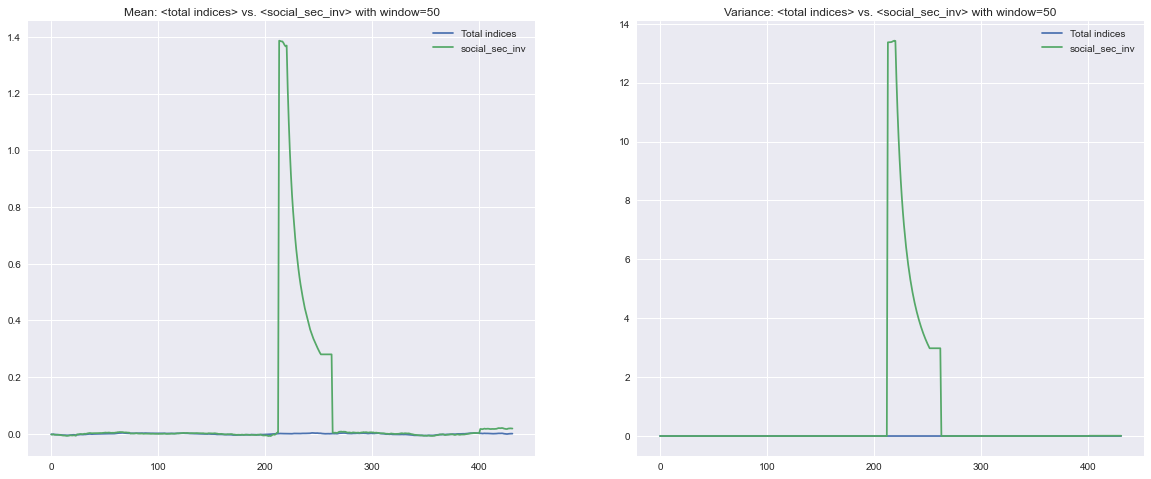

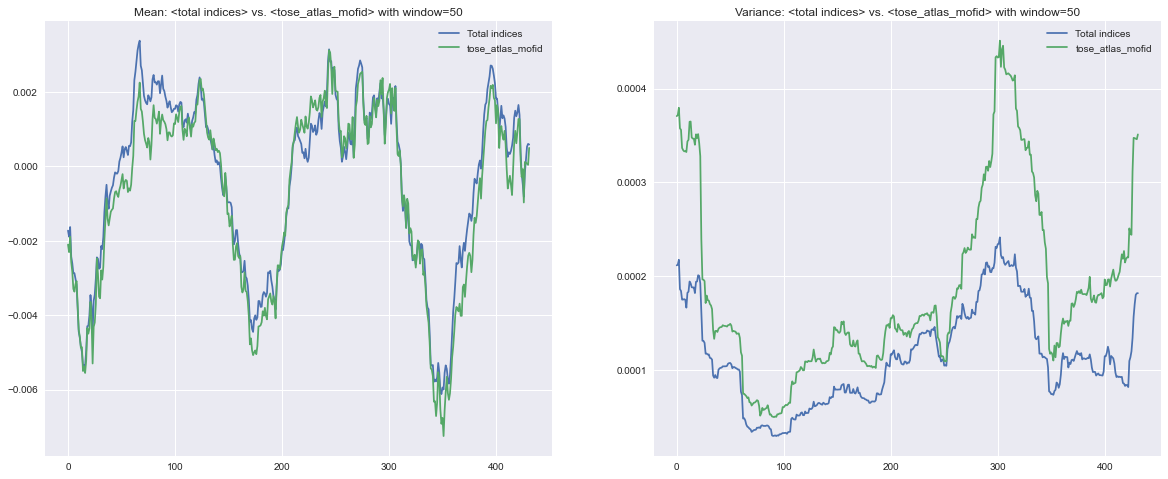

In [994]:
for i_window, (means, varss) in enumerate(zip(all_means_window, all_vars_window)):
    total_mean, total_var = means.pop(), varss.pop()
    for i_stock, (mean, var) in enumerate(zip(means, varss)):
        with plt.style.context('seaborn'):
            fig, ax = plt.subplots(1, 2, figsize=(20, 8))
            for i, (t, s, n, ax) in enumerate(zip([total_mean, total_var], [mean, var], ['Mean', 'Variance'], fig.axes)):
                ax.plot(t, label='Total indices')
                ax.plot(s, label=names[i_stock])
                ax.legend()
                ax.set_title('{}: <total indices> vs. <{}> with window={}'.format(n, names[i_stock], windows[i_window]))
            plt.show()

### Q2.


#### 2.A.

In [794]:
lags = 5
autocorr = sm.tsa.acf(total_indices.loc[:, '<RETURN>'], nlags=lags)
for i in range(len(autocorr)):
    print('The autocorrelation at lag {} is {:.4f}'.format(i, autocorr[i]))

The autocorrelation at lag 0 is 1.0000
The autocorrelation at lag 1 is 0.3048
The autocorrelation at lag 2 is 0.0124
The autocorrelation at lag 3 is 0.1159
The autocorrelation at lag 4 is 0.0294
The autocorrelation at lag 5 is -0.0298


<Figure size 864x576 with 0 Axes>

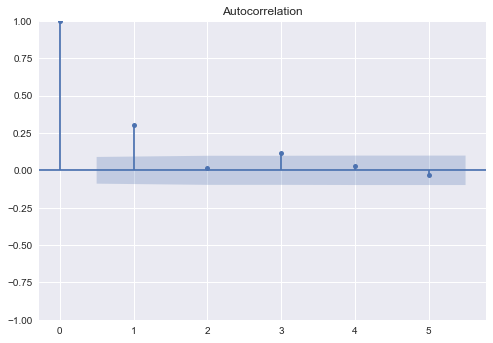

In [795]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    tsaplots.plot_acf(total_indices.loc[:, '<RETURN>'], lags=lags)
    plt.show()

#### 2.B.

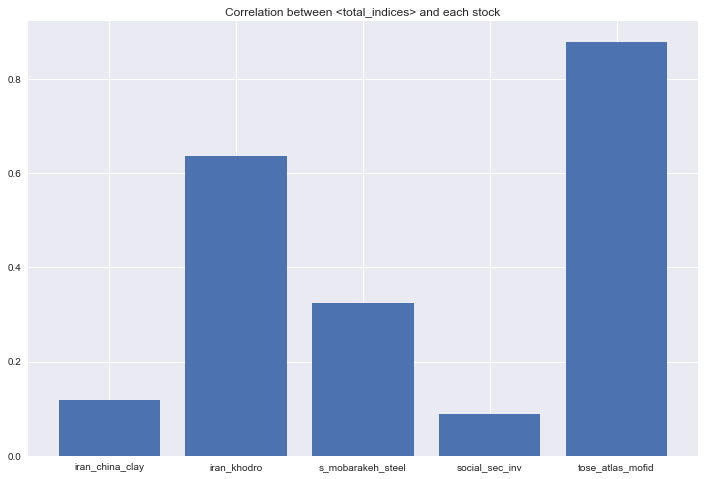

In [979]:
corrs = []
for stock in datasets[:-1]:
    temp = pd.merge(total_indices, stock,  how='left', left_on=['<DTYYYYMMDD>'], right_on = ['<DTYYYYMMDD>'])
    corrs.append(temp.loc[:, '<RETURN>_x'].corr(temp.loc[:, '<RETURN>_y']))
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    plt.bar(names[:-1], corrs)
    plt.title('Correlation between <total_indices> and each stock')
    plt.show()

#### 2.C.

In [1535]:
# !pip install finpy-tse

In [1534]:
import finpy_tse as fpy

In [1547]:
dollar = fpy.Get_USD_RIAL(
             start_date='1399-01-05',
             end_date  ='1401-10-11',
             ignore_date=False,
             show_weekday=False,
             double_date=False).iloc[::-1]
dollar

,Open,High,Low,Close
J-Date,,,,
1401-10-11,386820,397090,379820,393000
1401-10-10,406690,407020,389000,389000
1401-10-08,413630,417140,400560,416150
1401-10-08,418960,418960,418960,418960
1401-10-07,401040,425060,397830,403000
...,...,...,...,...
1399-01-19,157100,157100,156990,156990
1399-01-18,158010,158100,156990,156990
1399-01-17,157970,158100,157950,158030


In [1556]:
# Convert Jalali dates to Gregorian for "dollar" dataset
cnvs = []
for ele in dollar.iterrows():
    temp = ele[0].split('-')
    cnvs.append(int(JalaliDate(int(temp[0]), int(temp[1]), int(temp[2])).to_gregorian().strftime('%Y%m%d')))
dollar['<DTYYYYMMDD>'] = cnvs
dollar['<CLOSE>'] = dollar['Close']
dollar_returns = cal_returns(dollar)
dollar_returns.insert(0, 0)
dollar['<RETURN>'] = dollar_returns
dollar.head()

,Open,High,Low,Close,<DTYYYYMMDD>,<CLOSE>,<RETURN>
J-Date,,,,,,,
1401-10-11,386820,397090,379820,393000,20230101,393000,0.000000
1401-10-10,406690,407020,389000,389000,20221231,389000,-0.010178
1401-10-08,413630,417140,400560,416150,20221229,416150,0.069794
1401-10-08,418960,418960,418960,418960,20221229,418960,0.006752
1401-10-07,401040,425060,397830,403000,20221228,403000,-0.038094


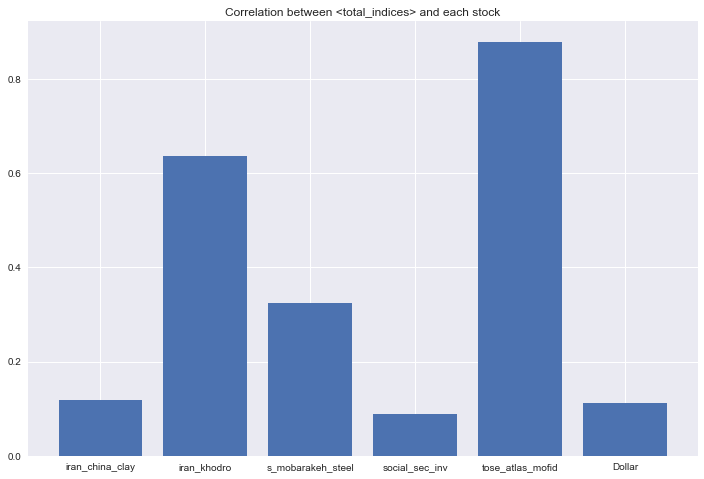

In [1563]:
corrs = []
for stock in datasets[:-1] + [dollar]:
    temp = pd.merge(total_indices, stock,  how='left', left_on=['<DTYYYYMMDD>'], right_on = ['<DTYYYYMMDD>'])
    corrs.append(temp.loc[:, '<RETURN>_x'].corr(temp.loc[:, '<RETURN>_y']))
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    plt.bar(names[:-1] + ['Dollar'], corrs)
    plt.title('Correlation between <total_indices> and each stock')
    plt.show()

In [1568]:
gold = fpy.Get_Price_History(
           stock='طلا',
           start_date='1399-01-05',
           end_date  ='1401-10-11',
           ignore_date=False,
           adjust_price=False,
           show_weekday=False,
           double_date=False)
gold

,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,
1399-01-05,54750,55439,54630,55275,55131,796095,43889588187,1559,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1399-01-06,55512,55948,54850,55580,55514,943789,52393410591,2007,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1399-01-09,56777,57500,56100,57200,56928,1171743,66704978151,2337,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1399-01-10,58500,59996,58300,59900,59312,935301,55474677179,1912,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1399-01-11,60001,62800,60001,62649,62144,938651,58331273255,2394,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
...,...,...,...,...,...,...,...,...,...,...,...
1401-10-04,130501,133000,130500,132650,132074,8170567,1079115500578,4780,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-10-05,133900,134980,133300,134295,134251,5235007,702807398227,4888,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-10-07,137405,140000,136970,139700,138690,6824288,946458115277,6083,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم


In [1569]:
# Convert Jalali dates to Gregorian for "gold" dataset
cnvs = []
for ele in gold.iterrows():
    temp = ele[0].split('-')
    cnvs.append(int(JalaliDate(int(temp[0]), int(temp[1]), int(temp[2])).to_gregorian().strftime('%Y%m%d')))
gold['<DTYYYYMMDD>'] = cnvs
gold['<CLOSE>'] = gold['Close']
gold_returns = cal_returns(gold)
gold_returns.insert(0, 0)
gold['<RETURN>'] = gold_returns
gold.head()

,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,<DTYYYYMMDD>,<CLOSE>,<RETURN>
J-Date,,,,,,,,,,,,,,
1399-01-05,54750,55439,54630,55275,55131,796095,43889588187,1559,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم,20200324,55275,0.000000
1399-01-06,55512,55948,54850,55580,55514,943789,52393410591,2007,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم,20200325,55580,0.005518
1399-01-09,56777,57500,56100,57200,56928,1171743,66704978151,2337,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم,20200328,57200,0.029147
1399-01-10,58500,59996,58300,59900,59312,935301,55474677179,1912,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم,20200329,59900,0.047203
1399-01-11,60001,62800,60001,62649,62144,938651,58331273255,2394,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم,20200330,62649,0.045893


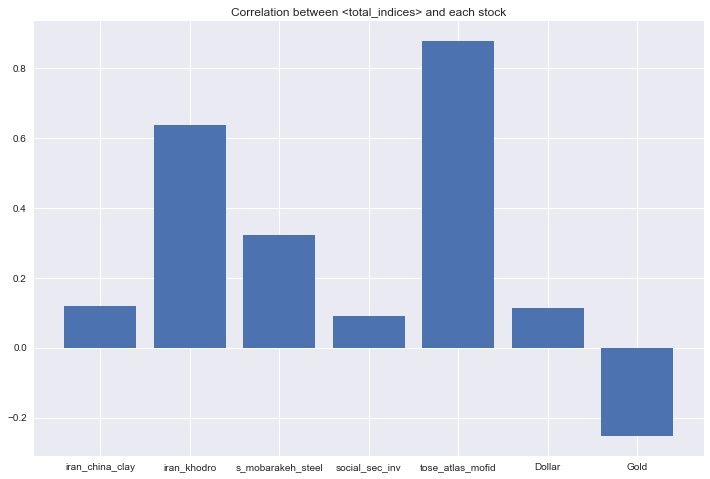

In [1571]:
corrs = []
for stock in datasets[:-1] + [dollar, gold]:
    temp = pd.merge(total_indices, stock,  how='left', left_on=['<DTYYYYMMDD>'], right_on = ['<DTYYYYMMDD>'])
    corrs.append(temp.loc[:, '<RETURN>_x'].corr(temp.loc[:, '<RETURN>_y']))
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    plt.bar(names[:-1] + ['Dollar', 'Gold'], corrs)
    plt.title('Correlation between <total_indices> and each stock')
    plt.show()

### Q3.

### Split Datas

In [1339]:
train ,test = train_test_split(total_indices, test_size=0.3, shuffle=False)

In [1340]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DTYYYYMMDD>  336 non-null    int64  
 1   <CLOSE>       336 non-null    float64
 2   <RETURN>      336 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 336 to 480
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DTYYYYMMDD>  145 non-null    int64  
 1   <CLOSE>       145 non-null    float64
 2   <RETURN>      145 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


(None, None)

#### 3.A.

In [1401]:
def linear_regression(train, window, next_pred=1):
    x_train, y_train = [], []
    chunks = get_days_group(train, window + next_pred, attr='<RETURN>')
    for chunk in chunks:
        x_train.append(list(chunk[:window]))
        y_train.append(list(chunk)[-1])
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model, x_train, y_train

In [1402]:
def predict(model, test, window, next_pred=1):
    x_test, y_test = [], []
    chunks = get_days_group(test, window + next_pred, attr='<RETURN>')
    for chunk in chunks:
        x_test.append(list(chunk[:window]))
        y_test.append(list(chunk)[-1])
    
    predictions = model.predict(x_test)
    mse = mean_absolute_error(y_test, predictions)
    return mse, x_test, y_test

In [1403]:
windows = [1, 5, 10, 25, 50]
for window in windows:
    model, x_train, y_train = linear_regression(train, window)
    mse, x_test, y_test = predict(model, test, window)
    print('MSE for Linear Regression and window size {}: {}'.format(window, round(mse, 4)))

MSE for Linear Regression and window size 1: 0.0088
MSE for Linear Regression and window size 5: 0.0085
MSE for Linear Regression and window size 10: 0.0085
MSE for Linear Regression and window size 25: 0.0081
MSE for Linear Regression and window size 50: 0.0089


MSE for Linear Regression and window size 25: 0.0081


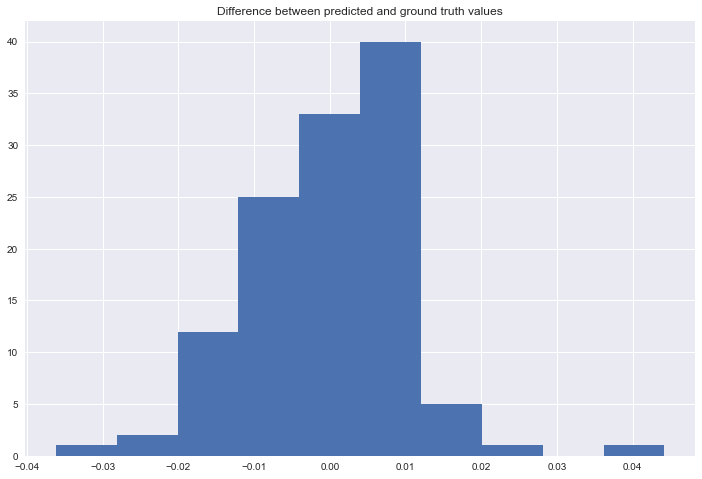

In [1416]:
window = 25
model, x_train, y_train = linear_regression(train, window)
mse, x_test, y_test = predict(model, test, window)
print('MSE for Linear Regression and window size {}: {}'.format(window, round(mse, 4)))
predictions = model.predict(x_test)
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    plt.hist(y_test - predictions)
    plt.title('Difference between predicted and ground truth values')
    plt.show()

#### 3.B.

In [1377]:
def logestic_regression(next_pred):
    windows = [1, 4, 12, 36, 50]
    print('Accuracy for Logistic Regression [Predict {} next day]'.format(next_pred))
    for window in windows:
        model, x_train, y_train = linear_regression(train, window, next_pred=next_pred)
        _, x_test, y_test = predict(model, test, window)

        sign_train = np.where(np.array(y_train) > 0, 1, 0)
        sign_test  = np.where(np.array(y_test)  > 0, 1, 0)

        model = LogisticRegression()
        model.fit(x_train, sign_train)

        train_acc = model.score(x_train, sign_train)
        test_acc  = model.score(x_test,  sign_test)
        
        print('window size {} --> train:{}, test:{}'.format(window, round(train_acc, 2), round(test_acc, 2)))    

In [1378]:
logestic_regression(next_pred=1)

Accuracy for Logistic Regression [Predict 1 next day]
window size 1 --> train:0.51, test:0.49
window size 4 --> train:0.62, test:0.65
window size 12 --> train:0.65, test:0.68
window size 36 --> train:0.51, test:0.55
window size 50 --> train:0.51, test:0.59


In [1379]:
logestic_regression(next_pred=2)

Accuracy for Logistic Regression [Predict 2 next day]
window size 1 --> train:0.5, test:0.49
window size 4 --> train:0.51, test:0.52
window size 12 --> train:0.52, test:0.51
window size 36 --> train:0.51, test:0.55
window size 50 --> train:0.52, test:0.59


In [1380]:
logestic_regression(next_pred=3)

Accuracy for Logistic Regression [Predict 3 next day]
window size 1 --> train:0.51, test:0.51
window size 4 --> train:0.5, test:0.51
window size 12 --> train:0.51, test:0.52
window size 36 --> train:0.51, test:0.55
window size 50 --> train:0.51, test:0.59


In [1381]:
logestic_regression(next_pred=4)

Accuracy for Logistic Regression [Predict 4 next day]
window size 1 --> train:0.53, test:0.67
window size 4 --> train:0.51, test:0.52
window size 12 --> train:0.53, test:0.51
window size 36 --> train:0.51, test:0.55
window size 50 --> train:0.52, test:0.59


In [1382]:
window = 12
model, x_train, y_train = linear_regression(train, window, next_pred=1)
_, x_test, y_test = predict(model, test, window)

sign_train = np.where(np.array(y_train) > 0, 1, 0)
sign_test  = np.where(np.array(y_test)  > 0, 1, 0)

model = LogisticRegression()
model.fit(x_train, sign_train)

train_acc = model.score(x_train, sign_train)
test_acc  = model.score(x_test,  sign_test)
print('Accuracy for window size {} --> train:{}, test:{}'.format(window, round(train_acc, 2), round(test_acc, 2)))

Accuracy for window size 12 --> train:0.65, test:0.68


In [1383]:
predictions = model.predict(x_test)
confusion_matrix(sign_test, predictions)

array([[48, 20],
       [23, 42]], dtype=int64)

#### 3.C.

In [1518]:
def multi_stock_linear_regression(train, datasets, window, next_pred=1):
    x_train, y_train = [], []
    chunks = get_days_group(train, window + next_pred, attr='<RETURN>')
    for chunk in chunks:
        x_train.append(list(chunk[:window]))
        y_train.append(list(chunk)[-1])
    chunks2 = get_days_group(train, window + next_pred)
    for i, chunk in enumerate(chunks2):
        for stock in datasets:
            for ele in chunk[:-1]:
                temp = stock.loc[stock['<DTYYYYMMDD>'].isin([ele])]['<RETURN>']
                if len(temp):
                    x_train[i].extend(temp)
                else:
                    x_train[i].append(0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model, x_train, y_train

In [1529]:
def multi_stock_predict(model, test, datasets, window, next_pred=1):
    x_test, y_test = [], []
    chunks = get_days_group(test, window + next_pred, attr='<RETURN>')
    for chunk in chunks:
        x_test.append(list(chunk[:window]))
        y_test.append(list(chunk)[-1])
    
    chunks2 = get_days_group(test, window + next_pred)
    for i, chunk in enumerate(chunks2):
        for stock in datasets:
            for ele in chunk[:-1]:
                temp = stock.loc[stock['<DTYYYYMMDD>'].isin([ele])]['<RETURN>']
                if len(temp):
                    x_test[i].extend(temp)
                else:
                    x_test[i].append(0)
                    
    predictions = model.predict(x_test)
    mse = mean_absolute_error(y_test, predictions)
    return mse, x_test, y_test

In [1524]:
# multi_stock_linear_regression(train=train, datasets=datasets[:-1], window=5)

In [1528]:
windows = [1, 5, 10, 25, 50]
for window in windows:
    model, x_train, y_train = multi_stock_linear_regression(train=train, datasets=datasets[:-1], window=window)
    mse, x_test, y_test = multi_stock_predict(model, datasets=datasets[:-1], test=test, window=window)
    print('MSE for multi stock Linear Regression and window size {}: {}'.format(window, round(mse, 4)))

MSE for multi stock Linear Regression and window size 1: 0.0091
MSE for multi stock Linear Regression and window size 5: 0.0095
MSE for multi stock Linear Regression and window size 10: 0.0099
MSE for multi stock Linear Regression and window size 25: 0.0107
MSE for multi stock Linear Regression and window size 50: 0.0366


In [1530]:
def multi_stock_logestic_regression(next_pred):
    windows = [1, 4, 12, 36, 50]
    print('Accuracy for Logistic Regression [Predict {} next day]'.format(next_pred))
    for window in windows:
        model, x_train, y_train = multi_stock_linear_regression(train=train, datasets=datasets[:-1], window=window)
        _, x_test, y_test = multi_stock_predict(model, datasets=datasets[:-1], test=test, window=window)

        sign_train = np.where(np.array(y_train) > 0, 1, 0)
        sign_test  = np.where(np.array(y_test)  > 0, 1, 0)

        model = LogisticRegression()
        model.fit(x_train, sign_train)

        train_acc = model.score(x_train, sign_train)
        test_acc  = model.score(x_test,  sign_test)
        
        print('window size {} --> train:{}, test:{}'.format(window, round(train_acc, 2), round(test_acc, 2)))    

In [1532]:
multi_stock_logestic_regression(next_pred=1)

Accuracy for Logistic Regression [Predict 1 next day]
window size 1 --> train:0.59, test:0.62
window size 4 --> train:0.57, test:0.6
window size 12 --> train:0.67, test:0.55
window size 36 --> train:0.76, test:0.54
window size 50 --> train:0.82, test:0.57


#### 3.D.

In [1460]:
def lasso(train, window, next_pred=1, alpha=0.00001):
    x_train, y_train = [], []
    chunks = get_days_group(train, window + next_pred, attr='<RETURN>')
    for chunk in chunks:
        x_train.append(list(chunk[:window]))
        y_train.append(list(chunk)[-1])
    
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    return model, x_train, y_train

In [1464]:
window = 10
model, x_train, y_train = lasso(train, window)
mse, x_test, y_test = predict(model, test, window)
print('MSE for Lasso and window size {}: {}'.format(window, round(mse, 4)))

MSE for Lasso and window size 10: 0.0089


In [1465]:
print(model.coef_)

[ 0.          0.         -0.02707155 -0.         -0.         -0.
 -0.          0.05635283 -0.          0.17397519]


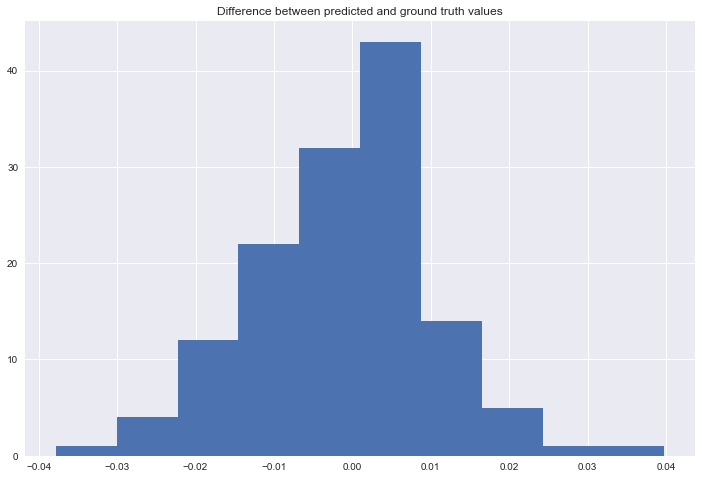

In [1467]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    predictions = model.predict(x_test)
    plt.hist(y_test - predictions)    
    plt.title('Difference between predicted and ground truth values')
    plt.show()

#### Finitoo